# **Estudo de Caso: Machine Learning p/ reconhecimento de máscaras** #
por Maria Eduarda Azevedo



**O que iremos abordar:**
1. OpenCV p/ reconhecimento facial e processamento de imagens
2. Montagem do nosso próprio conjunto de dados
3. Treinamento de um modelo classificador, utilizando a biblioteca scikit-learn
4. Montagem de uma app simples, p/ reconhecer se uma pessoa está ou não usando máscara

## Reconhecendo e classificando faces com OpenCV e Machine Learning

In [180]:
# importando bibliotecas
import cv2 as cv #OpenCV
import matplotlib.pyplot as plt 
import numpy as np 

In [181]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
# importando arquivo com Colab (deu erro... tive que fazer upload manualmente)
#from google.colab import files
#importados = files.upload()
#print("Arquivos importados:")
#print(*importados, sep="\n")

In [133]:
# lendo imagem com OpenCV
imagem = cv.imread("pessoas.jpg")

In [134]:
# Em Python, OpenCV é escrito em cima da biblioteca Numpy, portanto as imagens são lidas como array no tipo da biblioteca
type(imagem)

numpy.ndarray

Mostrando as imagens:

Quando estamos trabalhando com OpenCV em scripts, conseguimos mostrar as imagens utilizando a própria biblioteca, com o seguinte método:

In [135]:
# Mostrando as imagens
#cv.imshow("Imagem", imagem)

Porém, tal comando não executa em notebooks

para contornar este problema, vamos ler a imagem usando Matplotlib:

In [136]:
def mostrar_imagem(imagem):
  imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  plt.imshow(imagem_rgb)

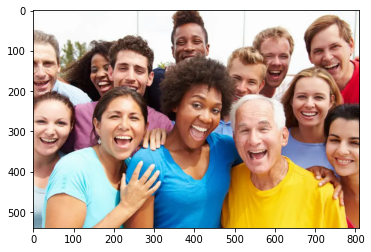

In [137]:
mostrar_imagem(imagem)

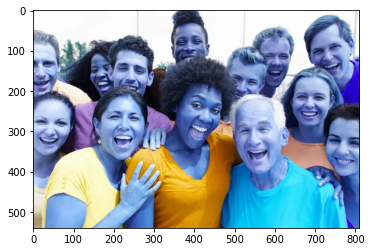

In [138]:
# experimentando mostrar a imagem sem a conversão de rgb
plt.imshow(imagem)
# imagem original está em BGR (cores ao contrátio, então Matplotlib lê lê RGB e sai o negativo da foto)

## Pré-processando imagens ##

Pré-processamos imagens na tentativa de diminuir os ruídos par ao nosso objetivo final. No caso do nosso estudo, precisaremos converter nossa imagem p/ escala de cinza.

In [139]:
imagem_cinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)

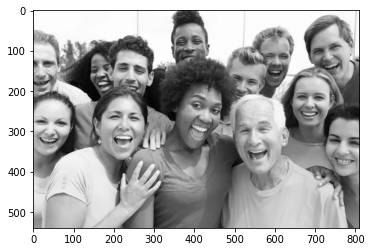

In [140]:
mostrar_imagem(imagem_cinza)

## Como usar o OpenCV para reconhecer faces? ##



O OpenCV é uma biblioteca de visão computacional que contém muitos artifícios para o estudo e desenvolvimento de ferramentas com tal tecnologia. Desse modo, existe nela uma série de implementações que podemos usar para detecção de faces.

A forma que vamos abordar aqui é utilizando o CascadeClassifier:<br>
* é uma implementação do modelo Viola-Jones p/ detecção de objetos em imagens. Esse algoritmo utiliza as **features de Haar** para identificar o que se deseja (no nosso caso, faces).

A imagem abaixo mostra como age a extração dessas features p/ o reconhecimento de um rosto em uma imagem.<br>
<img src="https://www.researchgate.net/profile/Tomas-Proscevicius/publication/237049645/figure/fig1/AS:299454470082567@1448406917463/Haar-features-examples-for-face-detection.png" />

Para o melhoramento do desempenho do algoritmo, utiliza-se o Adaboost, um algoritmo de ML utilizado p/ aumentar a performance de outros algoritmos.

Dentro da biblioteca, existe uma coleção de **features de Haar** que podem ser acessadas sem precisar baixar o arquivo e importá-lo. Consultando a documentação do OpenCV, assim como o depositório da biblioteca no GitHub, usaremos o arquivo **haarcascade_frontalface_alt2.xml** p/ identificar faces frontais.

In [141]:
features_haar = "haarcascade_frontalface_alt2.xml"

Sabendo o nome do arquivo, vamos utilizar o atributo **haarcascade** do OpenCV, que nos sinaliza a localização dos features de Haar dentro do conteúdo da biblioteca. Formatamos uma string com o caminho completo até o arquivo.

In [142]:
caminho = f"{cv.haarcascades}/{features_haar}"

In [143]:
# instanciando o modelo de classificação, passando as features de Haar como parâmetro
classificador = cv.CascadeClassifier(caminho)

Fazendo as predições necessárias, com o método **detectMultiScale** e passando nossa imagem em escala de cinza. Retornará uma matriz de coordenadas contendo a localização dos rostos encontrados na imagem.

In [144]:
faces = classificador.detectMultiScale(imagem_cinza)
# teste faces_rgb, na imagem original (BGR)
faces_rgb = classificador.detectMultiScale(imagem)

Para observarmos os rostos detectados, iremos percorrer essa matriz, extraindo os pontos necessários e desenhando um retângulo em volta de cada face, com o método **rectangle**.

In [145]:
imagem_copia = np.array(imagem)
imagem_copia_rgb = np.array(imagem)

In [146]:
for x, y, w, h in faces:
  cv.rectangle(imagem_copia, (x, y), (x+w, y+h), (0, 255, 0), 2)

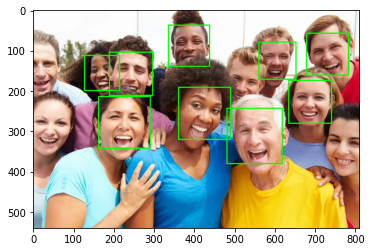

In [147]:
mostrar_imagem(imagem_copia)

Obs: com esta imagem que usei, o método identificou 9 rostos, mas deixou 4 de fora...)



---



In [148]:
for x, y, w, h in faces_rgb:
  cv.rectangle(imagem_copia_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

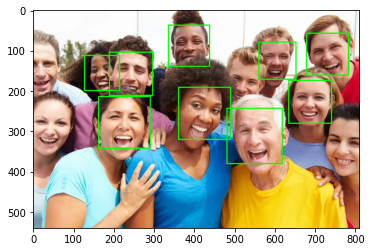

In [149]:
mostrar_imagem(imagem_copia_rgb)

**Obs**: com base na imagem original (em BGR), a detecção de rostos deu o mesmo resultado da escala de cinza: identificou 9 em 13 rostos. 

**Obs2**: os 4 rostos que não foram detectados estão parcialmente cortados ou cobertos


---



## Refazendo as etapas p/ detecção com outra imagem: "pessoas2.jpg"

In [182]:
imagem2 = cv.imread("pessoas2.jpg")

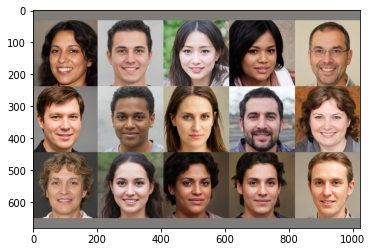

In [183]:
mostrar_imagem(imagem2)

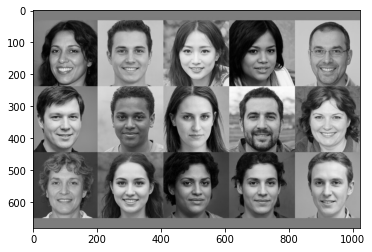

In [184]:
imagem2_cinza = cv.cvtColor(imagem2, cv.COLOR_BGR2GRAY)
mostrar_imagem(imagem2_cinza)

In [185]:
## método de detecção de faces
  # features_haar = "haarcascade_frontalface_alt2.xml"
  # caminho = f"{cv.haarcascades}/{features_haar}"
## instanciando o modelo de classificação, passando as features de Haar como parâmetro
  # classificador = cv.CascadeClassifier(caminho)
faces2 = classificador.detectMultiScale(imagem2)
faces2_cinza = classificador.detectMultiScale(imagem2_cinza)

In [186]:
imagem2_copia = np.array(imagem2)
for x, y, w, h in faces2:
  cv.rectangle(imagem2_copia, (x, y), (x+w, y+h), (0, 255, 0), 2)

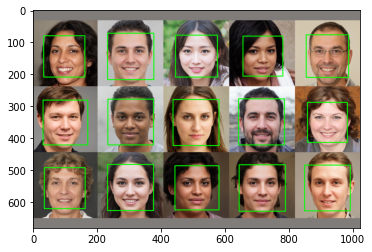

In [187]:
mostrar_imagem(imagem2_copia)

In [188]:
imagem2_copia2 = np.array(imagem2)
for x, y, w, h in faces2_cinza:
  cv.rectangle(imagem2_copia2, (x, y), (x+w, y+h), (0, 255, 0), 2)

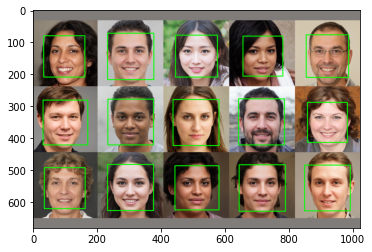

In [189]:
mostrar_imagem(imagem2_copia2)

### **OBS: Não havia rostos cortados ou cobertos, detecção 100% p/ os dois casos: imagem original (BGR) e imagem_cinza ###

## Recortando e padronizando imagens com o OpenCV

Depois de conseguir identificar rostos com o OpenCV, vamos fazer uso disso para recortar e padronizar um conjunto de dados de faces.

Quando vamos trabalhar com Machine Learning aplicado a imagens, é importante que todas estejam devidamente padronizadas, isto é, com mesmas dimensões, mes representação de cor...

In [190]:
# salvando as imagens cortadas em uma lista
imagens_cortadas = list()

Percorrendo mais uma vez as faces encontradas, vamos cortar as imagens utilizando um **slice**.

Logo após cortada a região onde se encontra o rosto, vamos redimensioná-la, para que todas as imagens fiquem com o mesmo tamanho, para tal, utilizamos o método **resize** do OpenCV.

Feito esse processamento, vamos adicionar a imagem na nossa lista de imagens cortadas.

In [191]:
for x,y,w,h in faces2:
  face = imagem2[y:y+h, x:x+w]
  face = cv.resize(face, (160,160))
  imagens_cortadas.append(face)

Observe abaixo que o tamanho da lista é 15, pois salvamos 15 faces encontradas na imagem

In [192]:
len(imagens_cortadas)

15

In [193]:
# mostrando dimensões de cada imagem
for img in imagens_cortadas:
  print(img.shape)

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


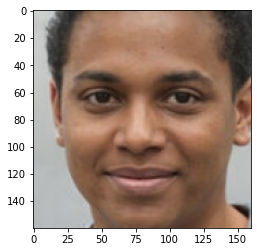

In [194]:
# mostrando uma das imagens cortadas
mostrar_imagem(imagens_cortadas[5])

## Organizando conjunto de dados em um diretório

Após padronizar os dados do nosso conjunto, vamos salvar essas imagens em um diretório, para que possamos acessá-las depois no nosso estudo.

In [163]:
import os 

In [178]:
def salvar_imagens(imagens, caminho):
  if not os.path.exists(caminho):
    os.mkdir(caminho)

  index = len(os.listdir(caminho))

  for img in imagens:
    cv.imwrite(f"{caminho}/{index}.jpg", img)
    index += 1

In [179]:
salvar_imagens(imagens_cortadas, "/content/gdrive/MyDrive/Colab Notebooks/Mask-detect/imagens/pessoas")

Salvamos nossas faces recortadas e padronizadas no google drive. O mesmo pode ser feito utilizando um script e salvando-as no cpu.